# Supervised Machine Learning: Classification problem

## Business Context
Flower Classification is a fundamental task in machine learning, aiming to categorize flowers into different species based on their physical attributes. Accurate classification models can assist botanists, horticulturists, and educators in identifying and studying various flower species efficiently.

## Problem Statement
The Iris dataset, a classic in machine learning, comprises measurements of iris flowers from three different species. The objective is to develop a predictive model that accurately classifies iris flowers into their respective species based on these measurements.

## Objective

- **Type of Task:** Classification
- **Goal:** Develop a predictive model to classify iris flowers into one of three species: Setosa, Versicolor, or Virginica.

## Success Criteria

### Evaluation Metrics
1. Accuracy: The proportion of correctly classified instances out of the total instances.
2. Precision: The ratio of correctly predicted positive observations to the total predicted positives.
3. Recall (Sensitivity): The ratio of correctly predicted positive observations to all actual positives.
4. F1-Score: The weighted average of Precision and Recall.
5. Confusion Matrix: A table to describe the performance of the classification model.

### Performance Goals
- Accuracy: Aim for an accuracy of ≥ 95%.
- F1-Score: Strive for an F1-Score as close to 1 as possible for each class.
- Confusion Matrix: Minimal misclassifications across all classes.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

In [28]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='Species')

# Combine features and target into a single DataFrame
dataset = pd.concat([X, y], axis=1)

print(dataset.shape)
# Display the first five rows
dataset.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Exploration and Preparation

## Data Cleaning

#### A. Handle Missing Values

In [29]:
# identify missing values
missing_values = dataset.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [30]:
# remove columns containing missing values
dataset = dataset.dropna()

print(f"Dataset Shape After Dropping Rows with Any Missing Values: {dataset.shape}")

print("Missing Values After Dropping Rows:\n", dataset.isnull().sum())

Dataset Shape After Dropping Rows with Any Missing Values: (150, 5)
Missing Values After Dropping Rows:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [31]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### Remove duplicates


In [32]:
# Check for duplicate rows
duplicate_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
dataset = dataset.drop_duplicates()
print(f"Dataset Shape After Removing Duplicates: {dataset.shape}")


Number of duplicate rows: 1
Dataset Shape After Removing Duplicates: (149, 5)


#### Address Outliers(If any)


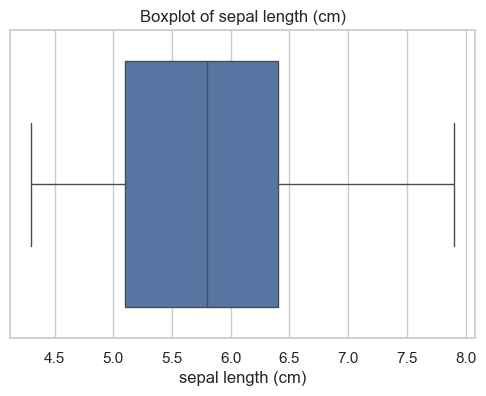

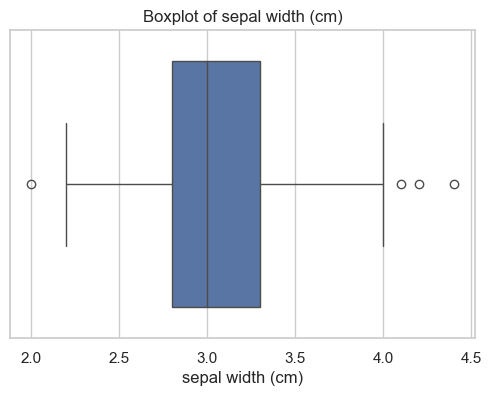

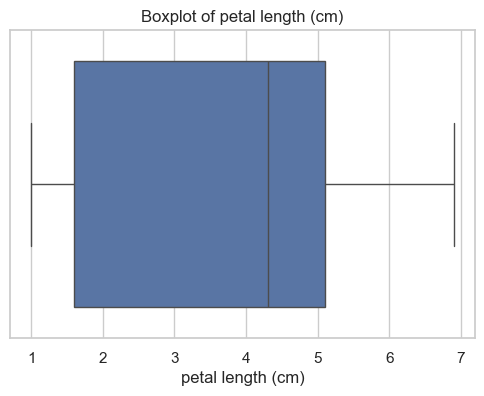

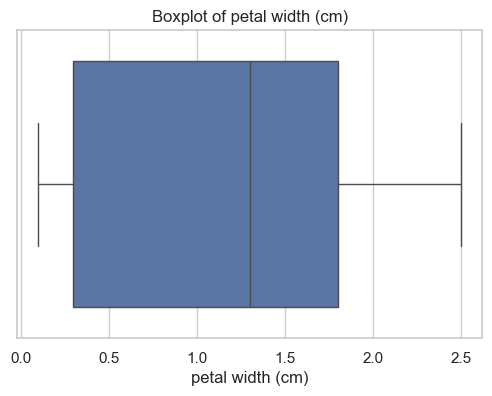

In [33]:
numerical_cols = iris.feature_names

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Exploratory Data Analysis


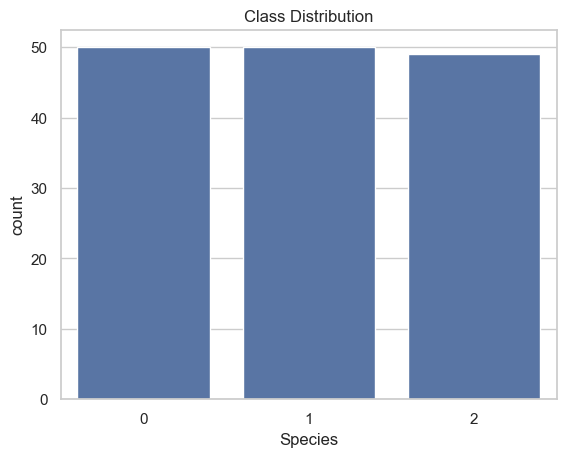

In [34]:
# Checking class distribution
sns.countplot(x='Species', data=dataset)
plt.title('Class Distribution')
plt.show()

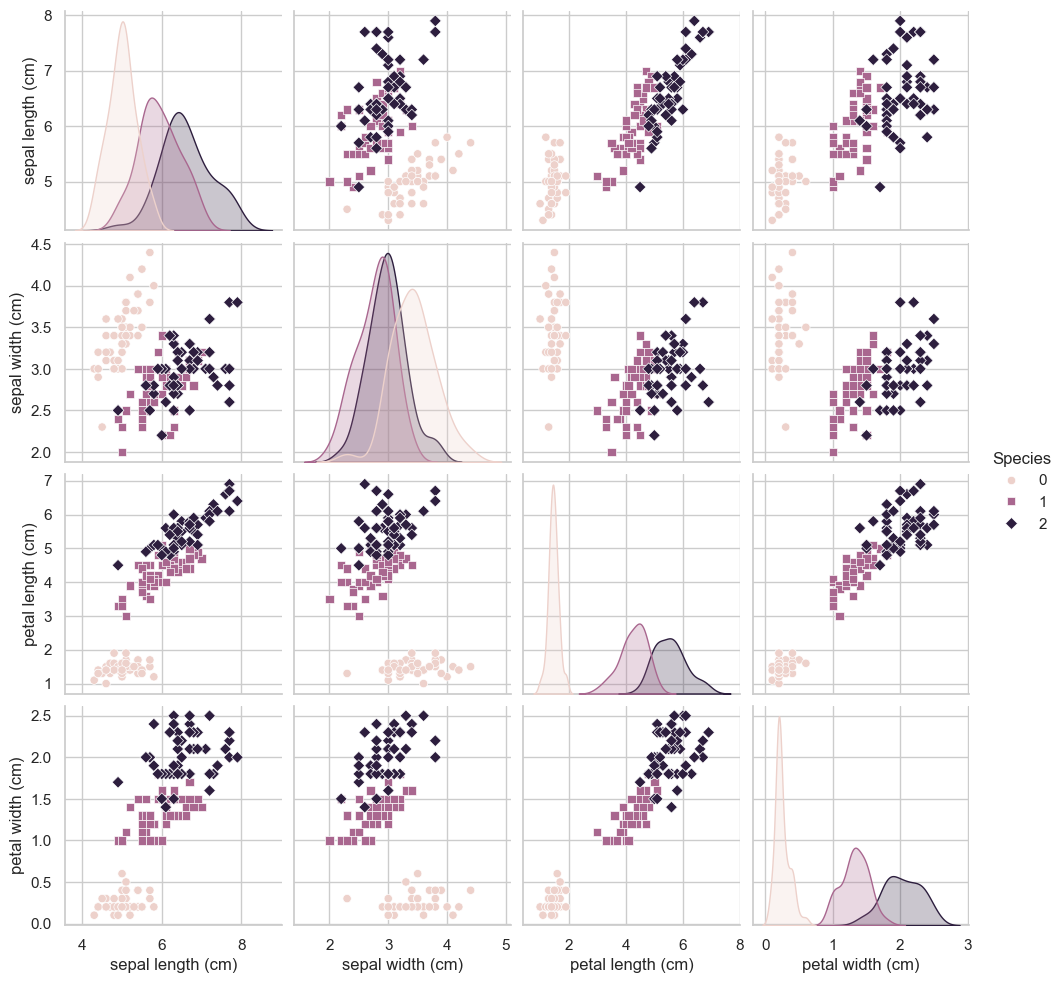

In [35]:
# Pairplot to visualize relationships between features
sns.pairplot(dataset, hue='Species', markers=["o", "s", "D"])
plt.show()

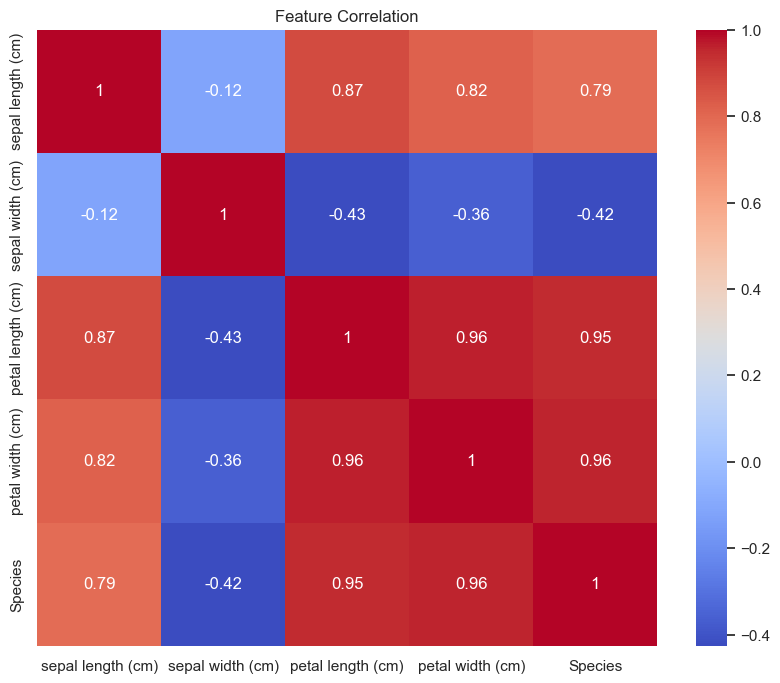

In [36]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### Data Splitting

In [37]:
# Features and target
X = dataset.drop("Species", axis=1)
y = dataset["Species"]

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model development and Training

In [39]:
# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=200)

# Define hyperparameters for GridSearch
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [40]:
# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameters for GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


### Model Evaluation and Hyperparameter Tuning

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



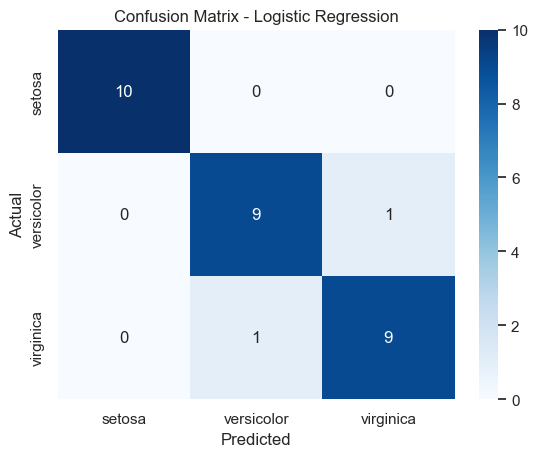

In [41]:
# Best Logistic Regression model
best_lr = grid_search_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluation Metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



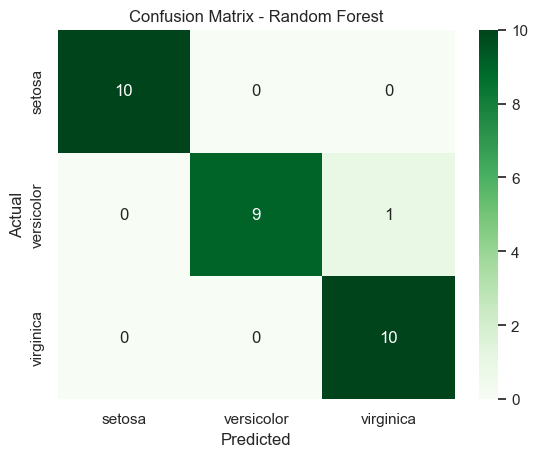

In [42]:
# Best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation Metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
# Accuracy Scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# compare the accuracy of the two models
if accuracy_lr > accuracy_rf:
    print("Logistic Regression model is better than Random Forest model")
else:
    print("Random Forest model is better than Logistic Regression model")

# choose the best model
model = best_lr if accuracy_lr > accuracy_rf else best_rf

Logistic Regression Accuracy: 0.9333
Random Forest Accuracy: 0.9667
Random Forest model is better than Logistic Regression model


#### Feature Importance (Random Forest)


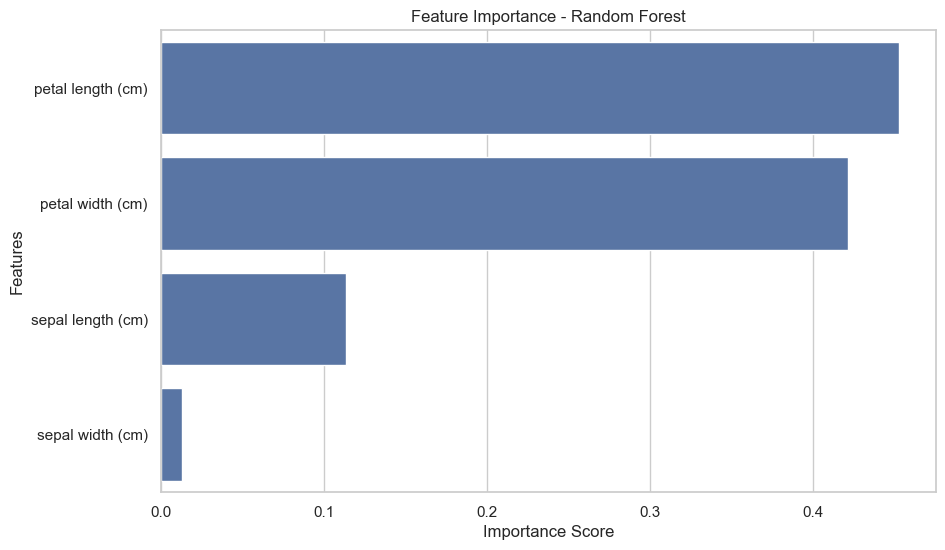

In [46]:
# Feature importance from Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance - Random Forest')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [47]:
# Create models directory if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

if not os.path.exists("models/iris_classification"):
    os.makedirs("models/iris_classification")

base = "models/iris_classification/"
# Save the model
model_filename = base + "iris_classifier_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")


# Save the scaler
scaler_filename = base + "standard_scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

Model saved to models/iris_classification/iris_classifier_model.pkl
Scaler saved to models/iris_classification/standard_scaler.pkl
